In [17]:
#importing all of our libraries to be used
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import string
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import missingno as msno
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

#importing dataframe and printing its columns
df = pd.read_csv('data.csv')
df.info()
print(list(df.columns))


df.replace((1, 0),('yes', 'no') , inplace=True) 






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [18]:
#Cleaning the gender and age columns
df.drop(df[df['Age'] < 0].index, inplace = True) 
df.drop(df[df['Age'] > 100].index, inplace = True)
df['Age'].unique()
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

df['Gender'].value_counts()

Male      988
Female    247
Other      19
Name: Gender, dtype: int64

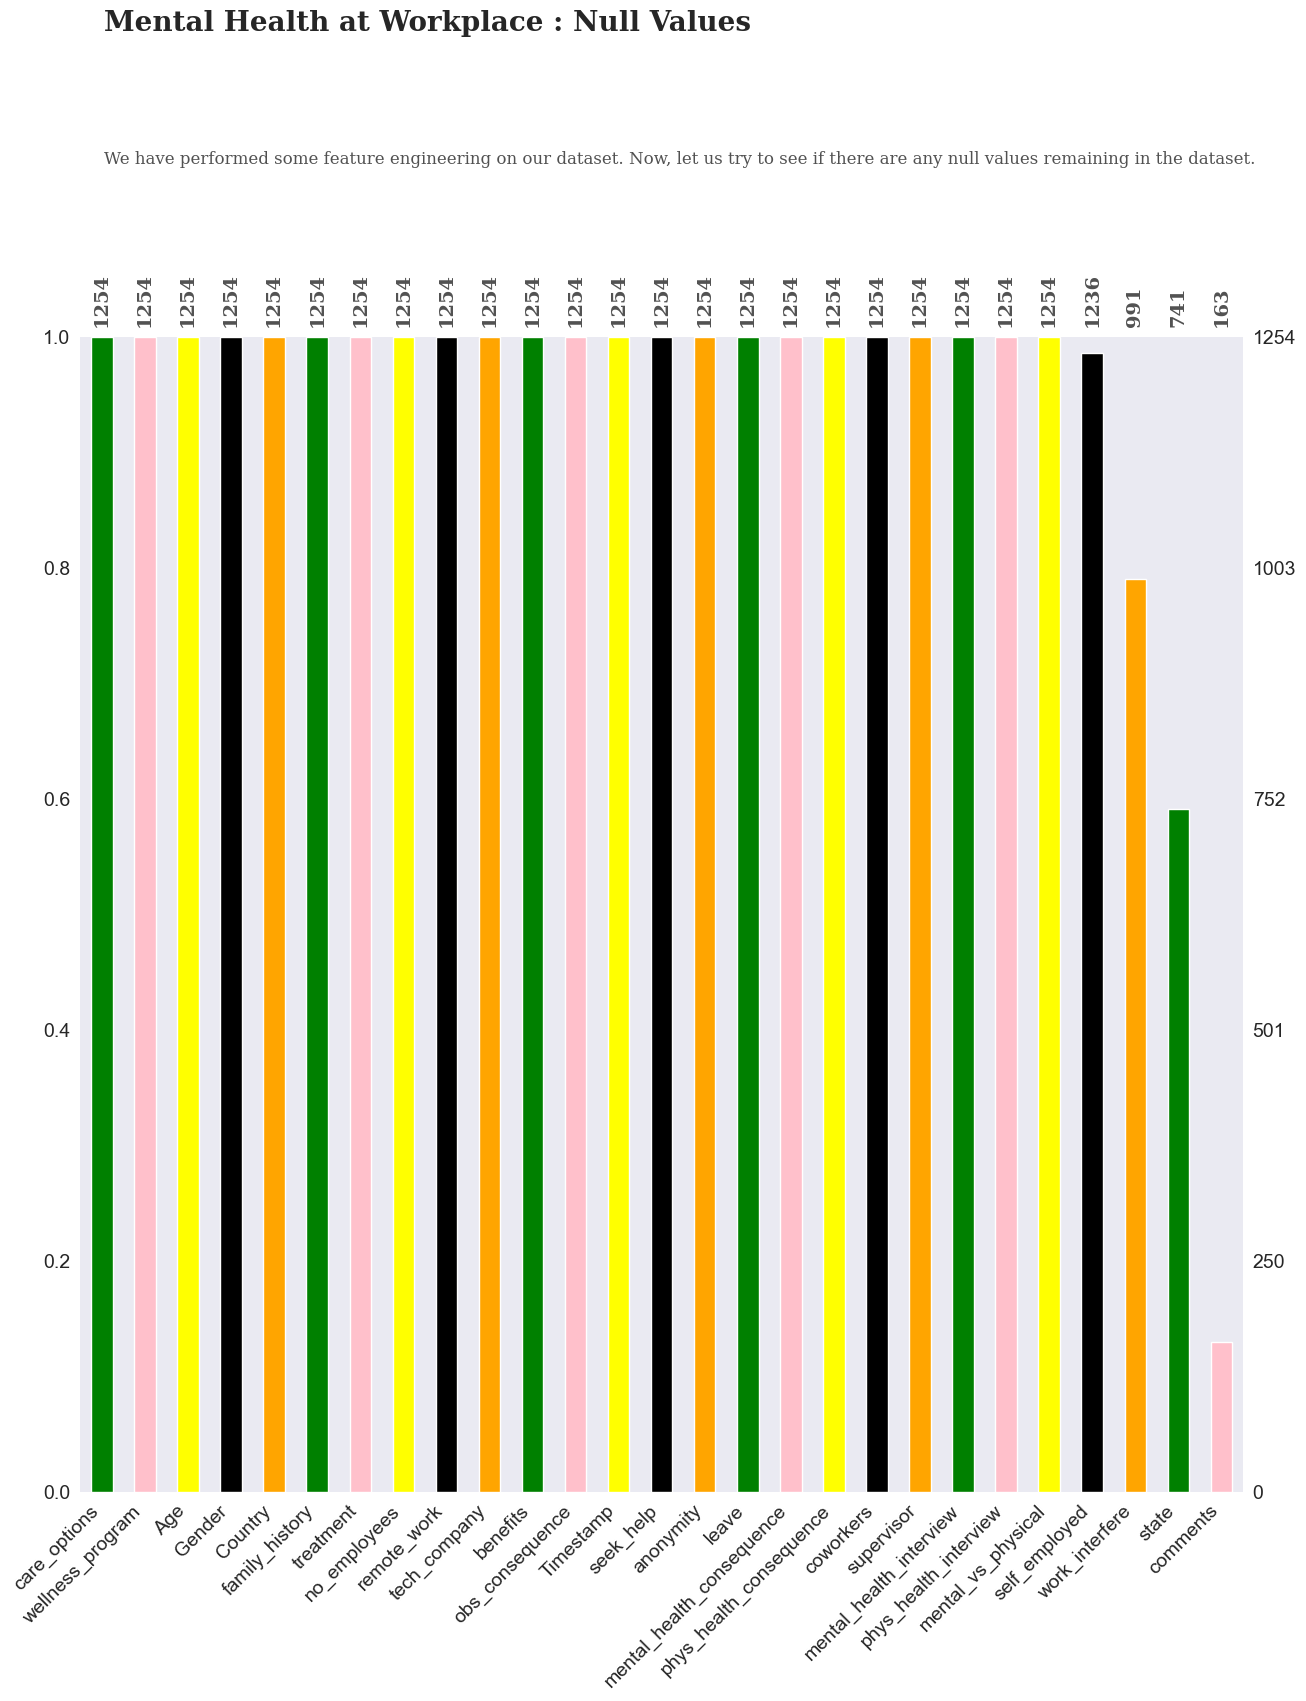

In [19]:
sns.set_style('dark')
color = ['green','pink','yellow','black','orange']
msno.bar(df,fontsize =14, color = color, sort = 'descending', figsize = (15,15))

plt.text(0.05,1.265,'Mental Health at Workplace : Null Values', {'font':'serif', 'size':20, 'weight':'bold'})
plt.text(0.05,1.15,'''We have performed some feature engineering on our dataset. Now, let us try to see if there are any null values remaining in the dataset.''', {'font':'serif', 'size':12, 'weight':'normal'}, alpha = 0.8)
plt.xticks( rotation = 90, 
                   **{'font':'serif','size':14,'weight':'bold','horizontalalignment': 'center'},alpha = 0.8)

plt.show()

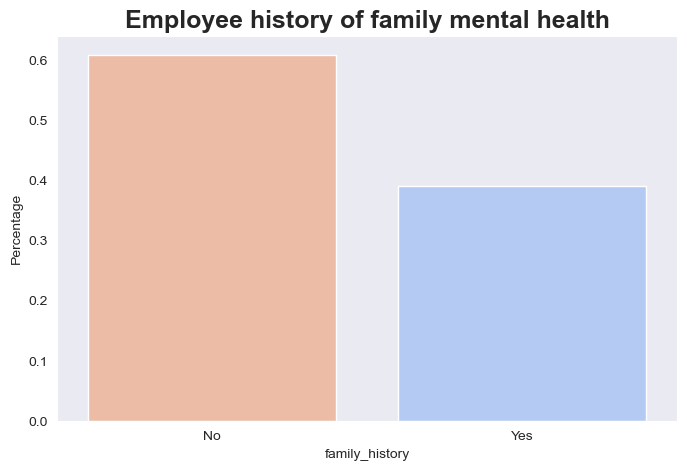

In [20]:
df.replace((1, 0),('yes', 'no') , inplace=True) 
plt.figure(figsize = (8,5))
plt.title('Employee history of family mental health', fontsize=18, fontweight='bold')
eda_percentage = df['family_history'].value_counts(normalize = True).rename_axis('family_history').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'family_history', y = 'Percentage', data = eda_percentage.head(10), palette='coolwarm_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 


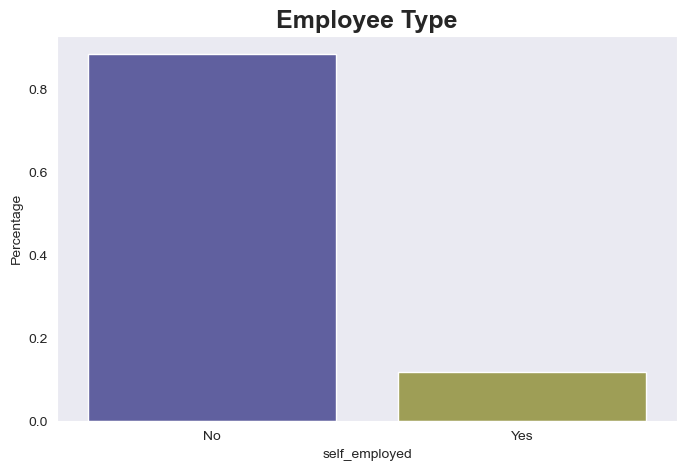

In [21]:
df.replace((1, 0,2),('yes', 'no','no data') , inplace=True) 
plt.figure(figsize = (8,5))
plt.title('Employee Type', fontsize=18, fontweight='bold')
eda_percentage = df['self_employed'].value_counts(normalize = True).rename_axis('self_employed').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'self_employed', y = 'Percentage', data = eda_percentage.head(10), palette='gist_stern')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 


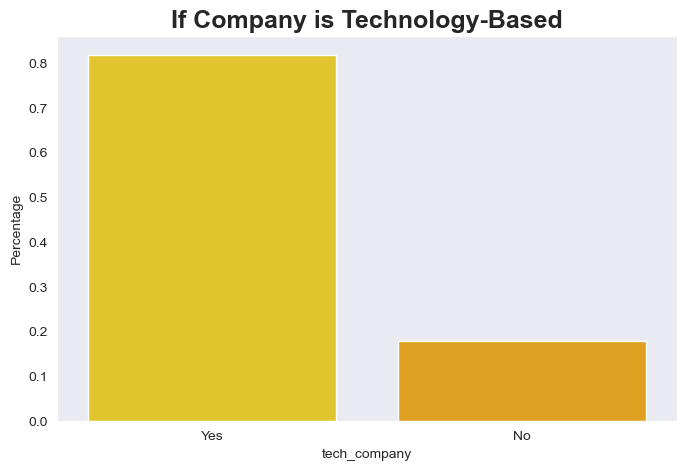

In [22]:
df.replace((1, 0,2),('yes', 'no','no data') , inplace=True) 
plt.figure(figsize = (8,5))
plt.title('If Company is Technology-Based', fontsize=18, fontweight='bold')
eda_percentage = df['tech_company'].value_counts(normalize = True).rename_axis('tech_company').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'tech_company', y = 'Percentage', data = eda_percentage.head(10), palette='Wistia')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 


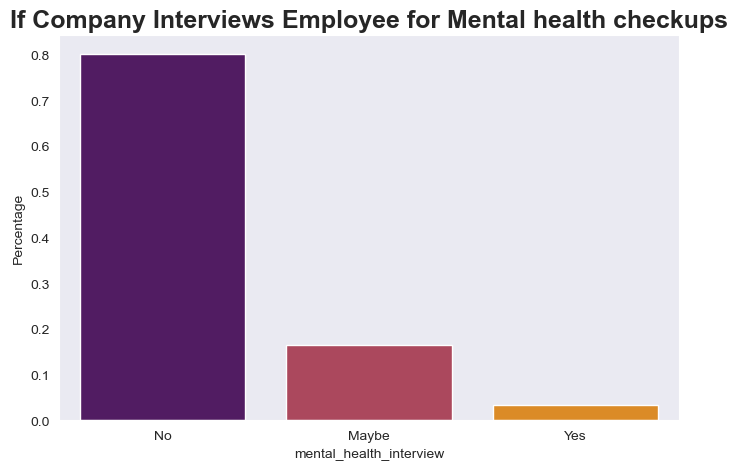

In [23]:
df.replace((1, 0,2),('yes', 'no','do not know') , inplace=True) 
plt.figure(figsize = (8,5))
plt.title('If Company Interviews Employee for Mental health checkups', fontsize=18, fontweight='bold')
eda_percentage = df['mental_health_interview'].value_counts(normalize = True).rename_axis('mental_health_interview').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'mental_health_interview', y = 'Percentage', data = eda_percentage.head(10), palette='inferno')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 


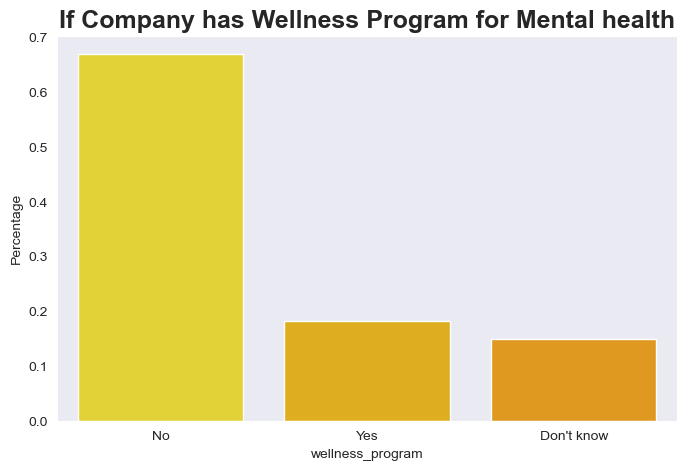

In [24]:
df.replace((1, 0,2),('yes', 'no','do not know') , inplace=True) 
plt.figure(figsize = (8,5))
plt.title('If Company has Wellness Program for Mental health', fontsize=18, fontweight='bold')
eda_percentage = df['wellness_program'].value_counts(normalize = True).rename_axis('wellness_program').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'wellness_program', y = 'Percentage', data = eda_percentage.head(10), palette='Wistia')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 


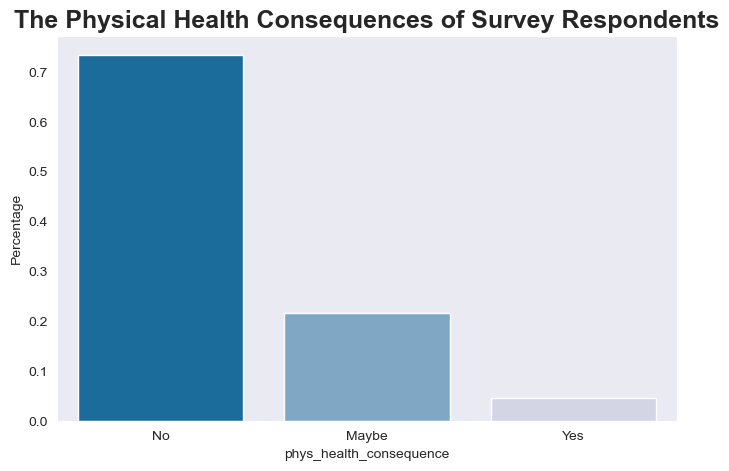

In [25]:
plt.figure(figsize = (8,5))
plt.title('The Physical Health Consequences of Survey Respondents', fontsize=18, fontweight='bold')
eda_percentage = df['phys_health_consequence'].value_counts(normalize = True).rename_axis('phys_health_consequence').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'phys_health_consequence', y = 'Percentage', data = eda_percentage.head(10), palette='PuBu_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 


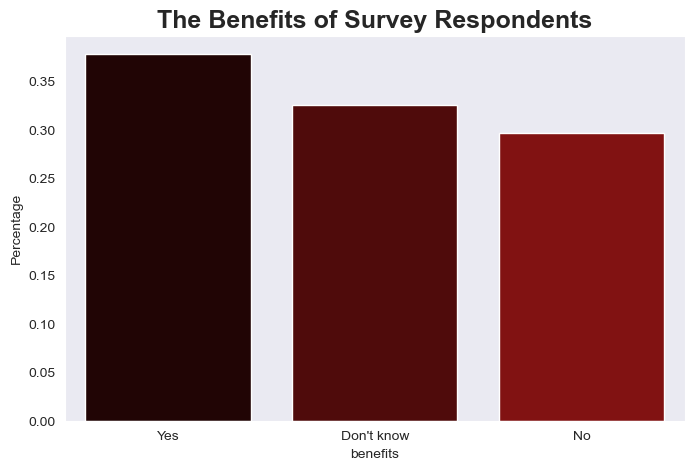

In [26]:
plt.figure(figsize = (8,5))
plt.title('The Benefits of Survey Respondents', fontsize=18, fontweight='bold')
eda_percentage = df['benefits'].value_counts(normalize = True).rename_axis('benefits').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'benefits', y = 'Percentage', data = eda_percentage.head(10), palette='flag_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 


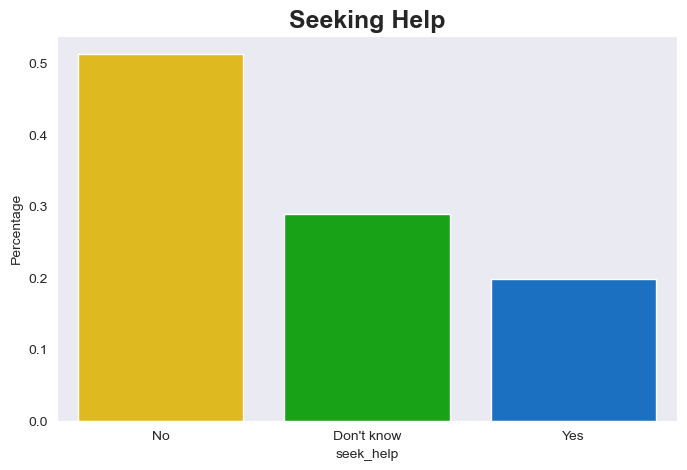

In [27]:
plt.figure(figsize = (8,5))
plt.title('Seeking Help', fontsize=18, fontweight='bold')
eda_percentage = df['seek_help'].value_counts(normalize = True).rename_axis('seek_help').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'seek_help', y = 'Percentage', data = eda_percentage.head(10), palette='nipy_spectral_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 


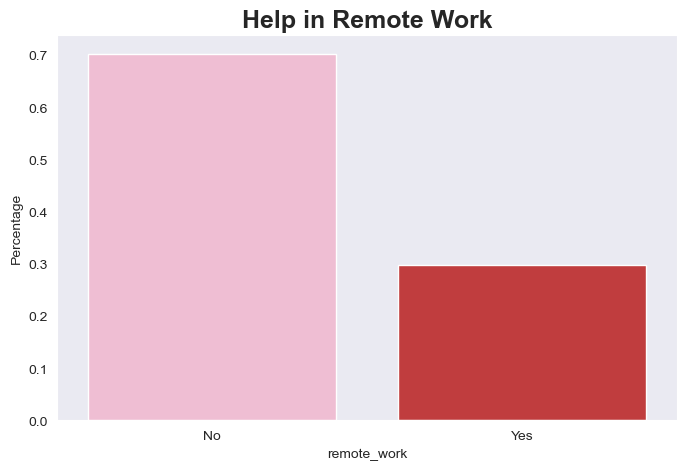

In [28]:
plt.figure(figsize = (8,5))
plt.title('Help in Remote Work', fontsize=18, fontweight='bold')
eda_percentage = df['remote_work'].value_counts(normalize = True).rename_axis('remote_work').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'remote_work', y = 'Percentage', data = eda_percentage.head(10), palette='tab20_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 


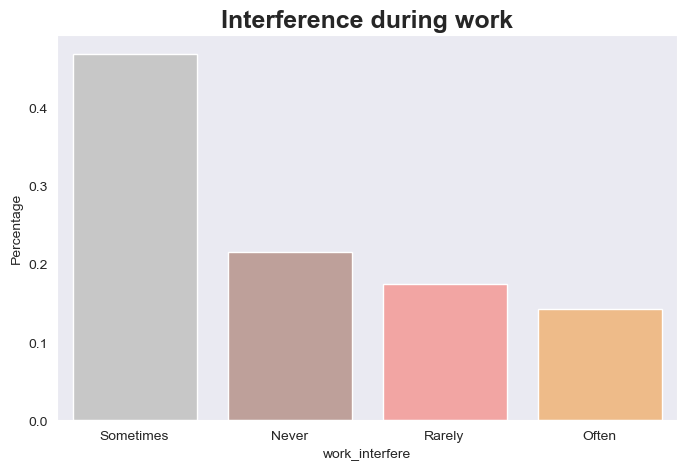

In [29]:
plt.figure(figsize = (8,5))
plt.title('Interference during work', fontsize=18, fontweight='bold')
eda_percentage = df['work_interfere'].value_counts(normalize = True).rename_axis('work_interfere').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'work_interfere', y = 'Percentage', data = eda_percentage.head(10), palette='tab20_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 


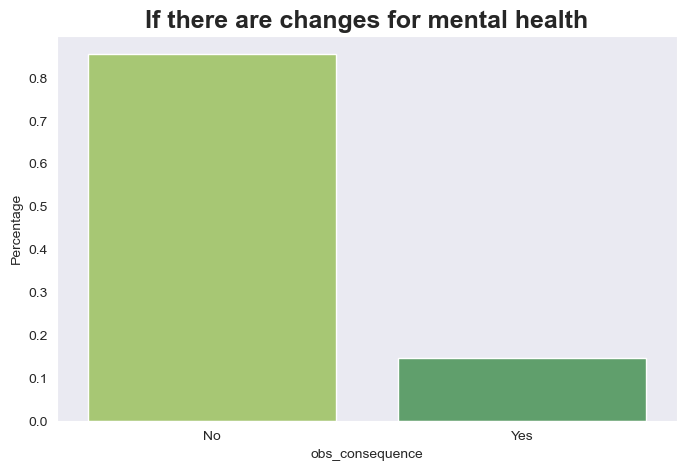

In [30]:
plt.figure(figsize = (8,5))
plt.title('If there are changes for mental health', fontsize=18, fontweight='bold')
eda_percentage = df['obs_consequence'].value_counts(normalize = True).rename_axis('obs_consequence').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'obs_consequence', y = 'Percentage', data = eda_percentage.head(10), palette='summer_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 


<AxesSubplot:>

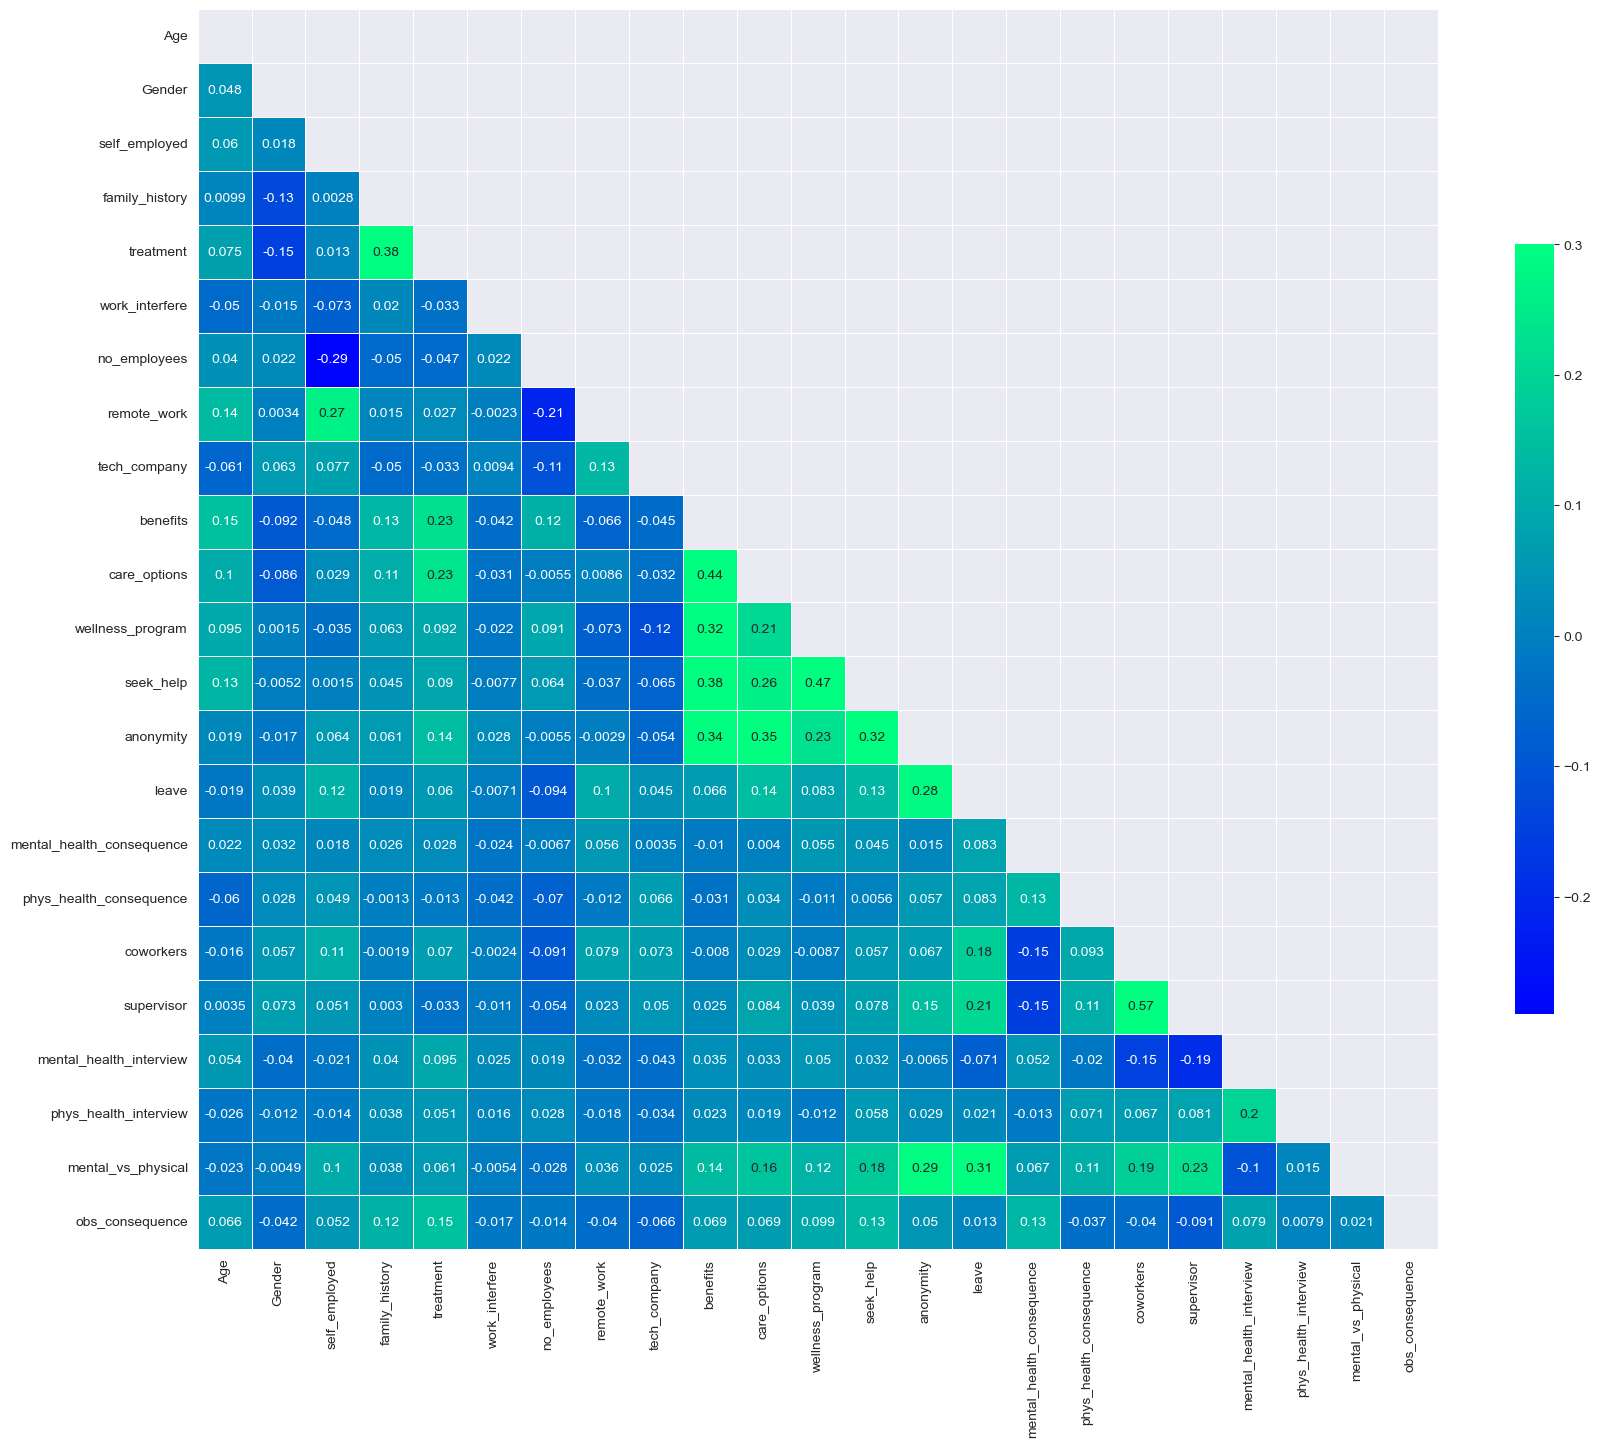

In [31]:
# Compute the correlation matrix

from sklearn.preprocessing import LabelEncoder
object_cols = ['Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='winter', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)